In [1]:
import numpy as np
import pandas as pd
import json
import os

In [2]:
df_train = pd.read_csv (r'C:\Users\DhanrajChowdhury\OneDrive - SPIKEWELL\IntentClassifier\Custom Intent\atis_snips\snips\train.csv')
df_test = pd.read_csv (r'C:\Users\DhanrajChowdhury\OneDrive - SPIKEWELL\IntentClassifier\Custom Intent\atis_snips\snips\test.csv')

df_train = df_train[df_train["intent"].str.contains("#")==False]
df_test = df_test[df_test["intent"].str.contains("#")==False]

#df = df_train.append(df_test, ignore_index=True)
df = pd.concat([df_train, df_test], ignore_index=True, sort=False)

text = df['text']
labels = df['intent']

classes = np.unique(labels)

In [3]:
#convert_to_dataframe

data = pd.DataFrame({'text': text, 'intent': labels})
print(data)

                                                    text              intent
0       listen to westbam alumb allergic on google music           PlayMusic
1             add step to me to the 50 clásicos playlist       AddToPlaylist
2      i give this current textbook a rating value of...            RateBook
3                   play the song little robin redbreast           PlayMusic
4      please add iris dement to my playlist this is ...       AddToPlaylist
...                                                  ...                 ...
14479          find a tv series called armageddon summer  SearchCreativeWork
14480               find politicsnation with al sharpton  SearchCreativeWork
14481                  rate this album 0 points out of 6            RateBook
14482  add leah kauffman to my uncharted 4 nathan dra...       AddToPlaylist
14483                       rate this album two out of 6            RateBook

[14484 rows x 2 columns]


In [4]:
with pd.option_context('display.max_rows', None):
    print(data.groupby("intent").count())
    
data.groupby("intent").count().shape

                      text
intent                    
AddToPlaylist         2042
BookRestaurant        2073
GetWeather            2100
PlayMusic             2100
RateBook              2056
SearchCreativeWork    2054
SearchScreeningEvent  2059


(7, 1)

In [5]:
classes

array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic',
       'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent'],
      dtype=object)

In [6]:
#convert_to_lower_case

data["lower"] = data.text.map(lambda x : x.lower())

In [7]:
# import nltk
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download('omw-1.4')

In [8]:
#word_tokenize

from nltk import word_tokenize

data["tokenized"] = data.lower.map(word_tokenize)

In [9]:
#stopwords_remove

from nltk.corpus import stopwords
from string import punctuation

def remove_stop(strings, stop_list):
    classed = [s for s in strings if s not in stop_list]
    return classed

stop = stopwords.words("english")
stop_punc = list(set(punctuation)) + stop

data["selected"] = data.tokenized.map(lambda df: remove_stop(df, stop_punc))

In [10]:
#normalize

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def normalize(text):
    return " ".join(text)

stemmer = LancasterStemmer()

data["lemmatized"] = data.selected.map(lambda xs: [lemmatizer.lemmatize(x) for x in xs])
data["normalized"] = data.lemmatized.apply(normalize)

data

,text,intent,lower,tokenized,selected,lemmatized,normalized
0,listen to westbam alumb allergic on google music,PlayMusic,listen to westbam alumb allergic on google music,"[listen, to, westbam, alumb, allergic, on, goo...","[listen, westbam, alumb, allergic, google, music]","[listen, westbam, alumb, allergic, google, music]",listen westbam alumb allergic google music
1,add step to me to the 50 clásicos playlist,AddToPlaylist,add step to me to the 50 clásicos playlist,"[add, step, to, me, to, the, 50, clásicos, pla...","[add, step, 50, clásicos, playlist]","[add, step, 50, clásicos, playlist]",add step 50 clásicos playlist
2,i give this current textbook a rating value of...,RateBook,i give this current textbook a rating value of...,"[i, give, this, current, textbook, a, rating, ...","[give, current, textbook, rating, value, 1, be...","[give, current, textbook, rating, value, 1, be...",give current textbook rating value 1 best rati...
3,play the song little robin redbreast,PlayMusic,play the song little robin redbreast,"[play, the, song, little, robin, redbreast]","[play, song, little, robin, redbreast]","[play, song, little, robin, redbreast]",play song little robin redbreast
4,please add iris dement to my playlist this is ...,AddToPlaylist,please add iris dement to my playlist this is ...,"[please, add, iris, dement, to, my, playlist, ...","[please, add, iris, dement, playlist, selena]","[please, add, iris, dement, playlist, selena]",please add iris dement playlist selena
...,...,...,...,...,...,...,...
14479,find a tv series called armageddon summer,SearchCreativeWork,find a tv series called armageddon summer,"[find, a, tv, series, called, armageddon, summer]","[find, tv, series, called, armageddon, summer]","[find, tv, series, called, armageddon, summer]",find tv series called armageddon summer
14480,find politicsnation with al sharpton,SearchCreativeWork,find politicsnation with al sharpton,"[find, politicsnation, with, al, sharpton]","[find, politicsnation, al, sharpton]","[find, politicsnation, al, sharpton]",find politicsnation al sharpton
14481,rate this album 0 points out of 6,RateBook,rate this album 0 points out of 6,"[rate, this, album, 0, points, out, of, 6]","[rate, album, 0, points, 6]","[rate, album, 0, point, 6]",rate album 0 point 6
14482,add leah kauffman to my uncharted 4 nathan dra...,AddToPlaylist,add leah kauffman to my uncharted 4 nathan dra...,"[add, leah, kauffman, to, my, uncharted, 4, na...","[add, leah, kauffman, uncharted, 4, nathan, dr...","[add, leah, kauffman, uncharted, 4, nathan, dr...",add leah kauffman uncharted 4 nathan drake pla...


In [11]:
#train_test_split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size = 0.15, random_state = 5)

In [12]:
#tf_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer

max_num_words = 10030

tokenizer = Tokenizer(num_words = max_num_words)
tokenizer.fit_on_texts(train_data.normalized)

word_index = tokenizer.word_index

tokenized_train = tokenizer.texts_to_sequences(train_data.normalized)
tokenized_test = tokenizer.texts_to_sequences(test_data.normalized)

In [13]:
len(word_index)

10027

In [15]:
#max_len_of_sentences

maxLen = 0
for t in tokenized_train+tokenized_test:
    if len(t) > maxLen:
        maxLen = len(t)

maxLen

22

In [16]:
#padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(tokenized_train, maxlen = maxLen, padding = "post")
test_padded = pad_sequences(tokenized_test, maxlen = maxLen, padding = "post")

In [17]:
print(train_padded.shape, test_padded.shape)

(12311, 22) (2173, 22)


In [17]:
#one_hot_encoded_x

def transform_x(data, tokenizer):
    output_shape = [data.shape[0],
                  data.shape[1],
                  tokenizer.word_index.keys().__len__()]
    results = np.zeros(output_shape)
    
    for i in range(data.shape[0]):
        for ii in range(data.shape[1]):
            results[i, ii, data[i,ii]-1]= 1
    return results

xtr_transformed = transform_x(train_padded, tokenizer)
xts_transformed = transform_x(test_padded, tokenizer)

In [18]:
xtr_transformed.shape

(12311, 22, 10027)

In [19]:
#one_hot_encoded_y

from sklearn.preprocessing import OneHotEncoder as OHE

y_encoder = OHE().fit(np.array(train_data.intent).reshape(-1,1))

ytr_encoded = y_encoder.transform(np.array(train_data.intent).reshape(-1,1)).toarray()
yts_encoded = y_encoder.transform(np.array(test_data.intent).reshape(-1,1)).toarray()

In [20]:
ytr_encoded.shape

(12311, 7)

In [21]:
embeddings_index={}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [22]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
num_words = min(max_num_words, len(word_index))+1
embedding_dim=len(embeddings_index['the'])
embedding_matrix = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [23]:
# #CNN

# import tensorflow as tf
# from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Dropout
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D

# embedding_layer = Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], trainable=True)

# sequence_input = Input(shape=(train_padded.shape[1],), dtype='int32')
# embedded_sequences = embedding_layer(sequence_input)
# x = Conv1D(64, 3, activation='relu')(embedded_sequences)
# x = Conv1D(64, 3, activation='relu')(x)
# x = MaxPooling1D(2)(x)
# x = Flatten()(x)
# x = Dense(100, activation='relu')(x)
# preds = Dense(ytr_encoded.shape[1], activation='softmax')(x)
# model = Model(sequence_input, preds)

# model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [24]:
# #Regular LSTM

# from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
# from tensorflow.keras.models import Sequential

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1],
#           trainable=False, weights=[embedding_matrix]))

# model.add(LSTM(256, return_sequences=True))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu"))
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))

# model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [25]:
# #Bidirectional LSTM

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1],
#           trainable=False, weights=[embedding_matrix]))

# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu"))
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [26]:
# #Bidirectional LSTM with Regularization

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
#           trainable=False, weights=[embedding_matrix]))
    
# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu", kernel_regularizer ='l1'))
# model.add(Dense(128, activation = "relu", kernel_regularizer ='l1'))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [27]:
# #Bidirectional LSTM with Regularization and Dropout

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
#                     trainable=False, weights=[embedding_matrix]))
    
# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu", kernel_regularizer ='l2'))
# model.add(Dense(128, activation = "relu", kernel_regularizer ='l2'))
# model.add(Dropout(0.3))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [28]:
#Bidirectional LSTM and Dropout(with Decaying LR)

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Input, Dropout, LSTM, CuDNNLSTM, Activation, Bidirectional, Embedding, BatchNormalization

model = Sequential()

model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
                    trainable=False, weights=[embedding_matrix]))
    
model.add(Bidirectional(CuDNNLSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(CuDNNLSTM(128, return_sequences=False))
model.add(BatchNormalization())

model.add(Dense(256, activation = "relu"))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [29]:
import math
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler

# tensorboard
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

# checkpoint
filepath="models/weights-improvement-{epoch:02d}-{accuracy:.2f}.ckpt"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1,
                             save_weights_only=True, save_best_only=True, mode='max')

# lr_scheduler
def step_decay(epoch):
    initial_lrate = 0.002
    drop = 0.5
    epochs_drop = 4.0
    
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    print("lr:", lrate)
    
    return lrate
    
#     if lrate >= 0.0000125:
#         return lrate
#     else:
#         return 0.0000125

lrate = LearningRateScheduler(step_decay)

callbacks_list = [lrate, tb_callback]

In [30]:
import tensorflow as tf

with tf.device('/cpu:0'):
    history = model.fit(train_padded, ytr_encoded, epochs = 20,
          batch_size = 64, shuffle=True,
          validation_split = 0.1, callbacks = callbacks_list)
#with tf.device('/device:GPU:0'):

Epoch 1/20
lr: 0.002
174/174 [==============================] - 30s 145ms/step - loss: 0.3949 - accuracy: 0.8653 - val_loss: 0.3260 - val_accuracy: 0.8985
Epoch 2/20
lr: 0.002
174/174 [==============================] - 24s 136ms/step - loss: 0.1406 - accuracy: 0.9588 - val_loss: 0.3826 - val_accuracy: 0.9002
Epoch 3/20
lr: 0.002
174/174 [==============================] - 24s 138ms/step - loss: 0.1059 - accuracy: 0.9688 - val_loss: 0.1350 - val_accuracy: 0.9602
Epoch 4/20
lr: 0.002
174/174 [==============================] - 24s 139ms/step - loss: 0.0883 - accuracy: 0.9735 - val_loss: 0.2192 - val_accuracy: 0.9302
Epoch 5/20
lr: 0.001
174/174 [==============================] - 24s 138ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.2826 - val_accuracy: 0.9075
Epoch 6/20
lr: 0.001
174/174 [==============================] - 23s 132ms/step - loss: 0.0492 - accuracy: 0.9833 - val_loss: 0.1119 - val_accuracy: 0.9635
Epoch 7/20
lr: 0.001
174/174 [==============================] - 23s 13

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 22, 100)           1000100   
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 22, 512)           733184    
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 22, 512)           0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 22, 512)           2048      
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 128)               328704    
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 128)               512       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 256)               3

In [32]:
# import tensorflow as tf

# with tf.device('/cpu:0'):
#     history = model.fit(train_padded, ytr_encoded, epochs = 5,
#           batch_size = 64, shuffle=True,
#           validation_split = 0.15)
# #with tf.device('/device:GPU:0'):

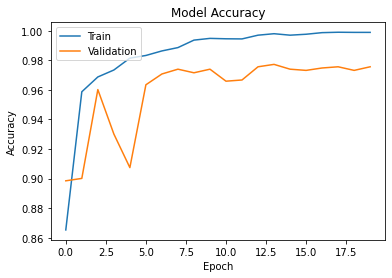

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

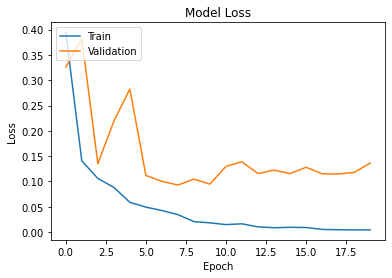

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
#performance_evaluation_train

from sklearn.metrics import classification_report

with tf.device('/cpu:0'):
    prediction = y_encoder.inverse_transform(model.predict(train_padded))
print(classification_report(train_data.intent, prediction))

                      precision    recall  f1-score   support

       AddToPlaylist       1.00      1.00      1.00      1732
      BookRestaurant       1.00      1.00      1.00      1757
          GetWeather       1.00      1.00      1.00      1784
           PlayMusic       0.99      1.00      1.00      1789
            RateBook       1.00      1.00      1.00      1743
  SearchCreativeWork       0.99      0.99      0.99      1774
SearchScreeningEvent       1.00      0.99      1.00      1732

            accuracy                           1.00     12311
           macro avg       1.00      1.00      1.00     12311
        weighted avg       1.00      1.00      1.00     12311



In [36]:
#performance_evaluation_test

from sklearn.metrics import classification_report

with tf.device('/cpu:0'):
    prediction_test = y_encoder.inverse_transform(model.predict(test_padded))
print(classification_report(test_data.intent, prediction_test))

                      precision    recall  f1-score   support

       AddToPlaylist       0.99      0.99      0.99       310
      BookRestaurant       1.00      0.99      0.99       316
          GetWeather       0.99      0.99      0.99       316
           PlayMusic       0.97      0.96      0.96       311
            RateBook       1.00      1.00      1.00       313
  SearchCreativeWork       0.92      0.95      0.93       280
SearchScreeningEvent       0.98      0.97      0.97       327

            accuracy                           0.98      2173
           macro avg       0.98      0.98      0.98      2173
        weighted avg       0.98      0.98      0.98      2173



<AxesSubplot:>

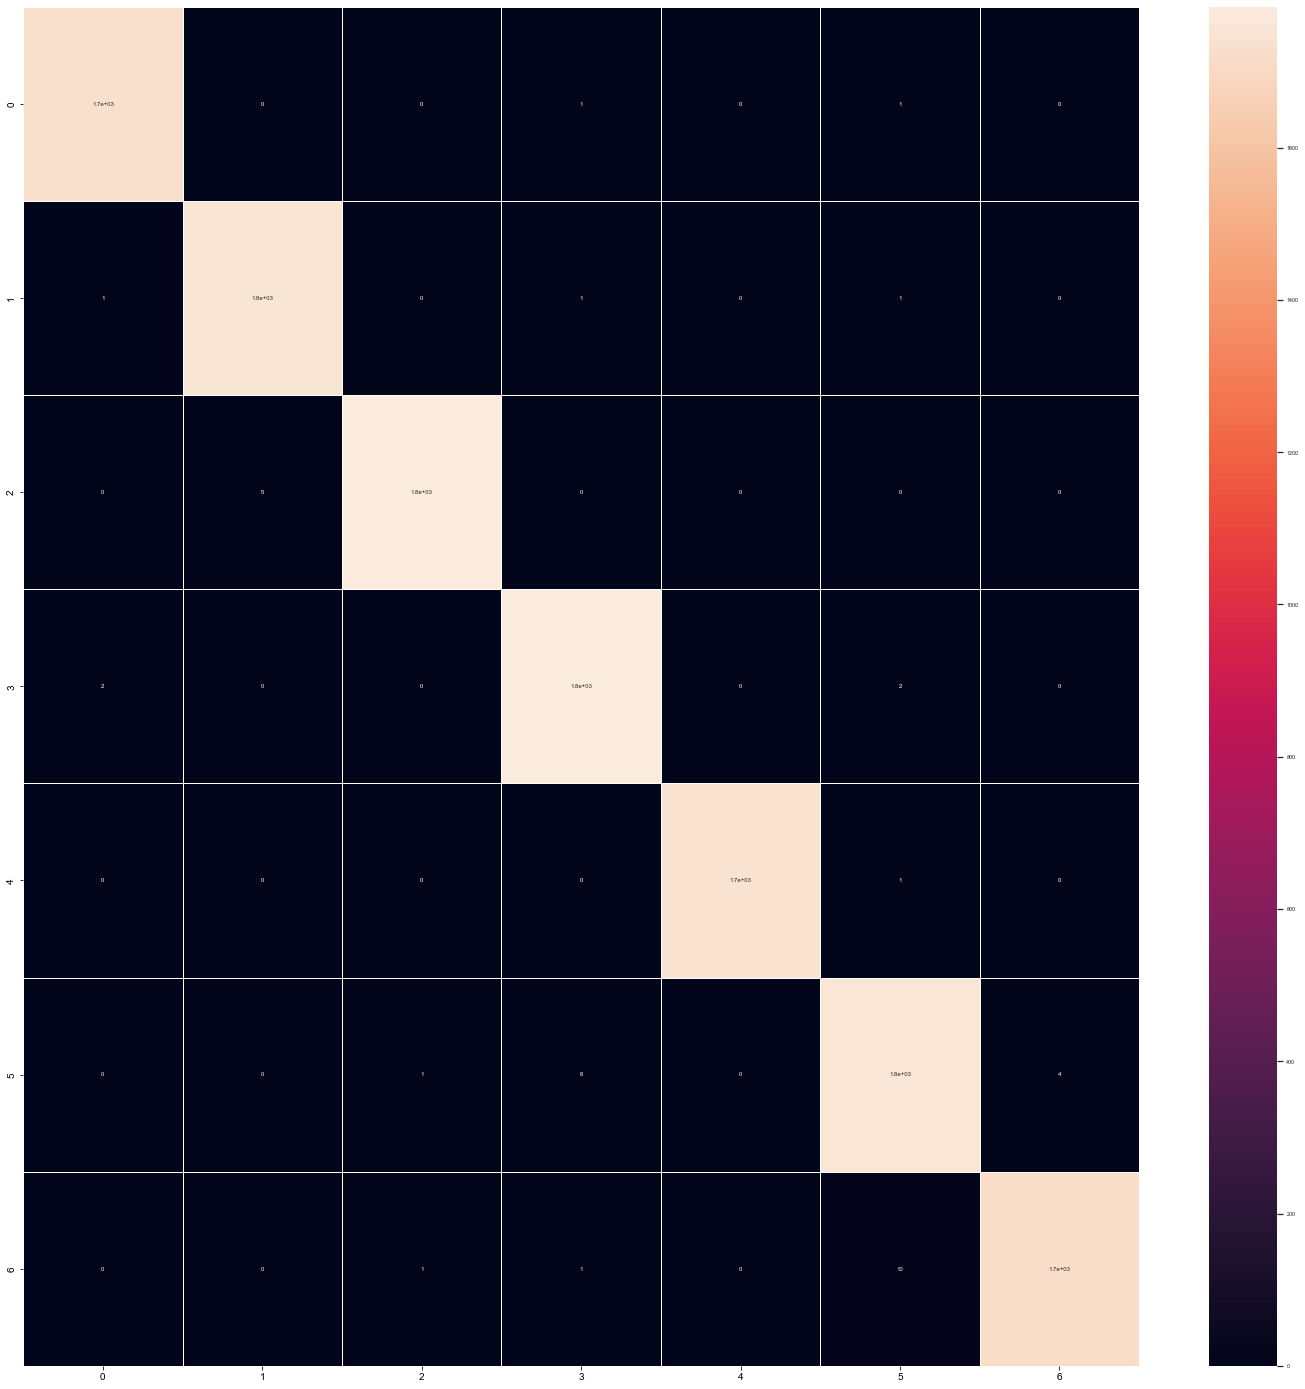

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(train_data.intent, prediction)

fig, ax = plt.subplots(figsize=(25,25))
sns.set(font_scale=0.5)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [38]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

incorr_fraction

array([0.00115473, 0.00170746, 0.00280269, 0.00223589, 0.00057372,
       0.00620068, 0.00692841])

Text(0, 0.5, 'Fraction of incorrect predictions')

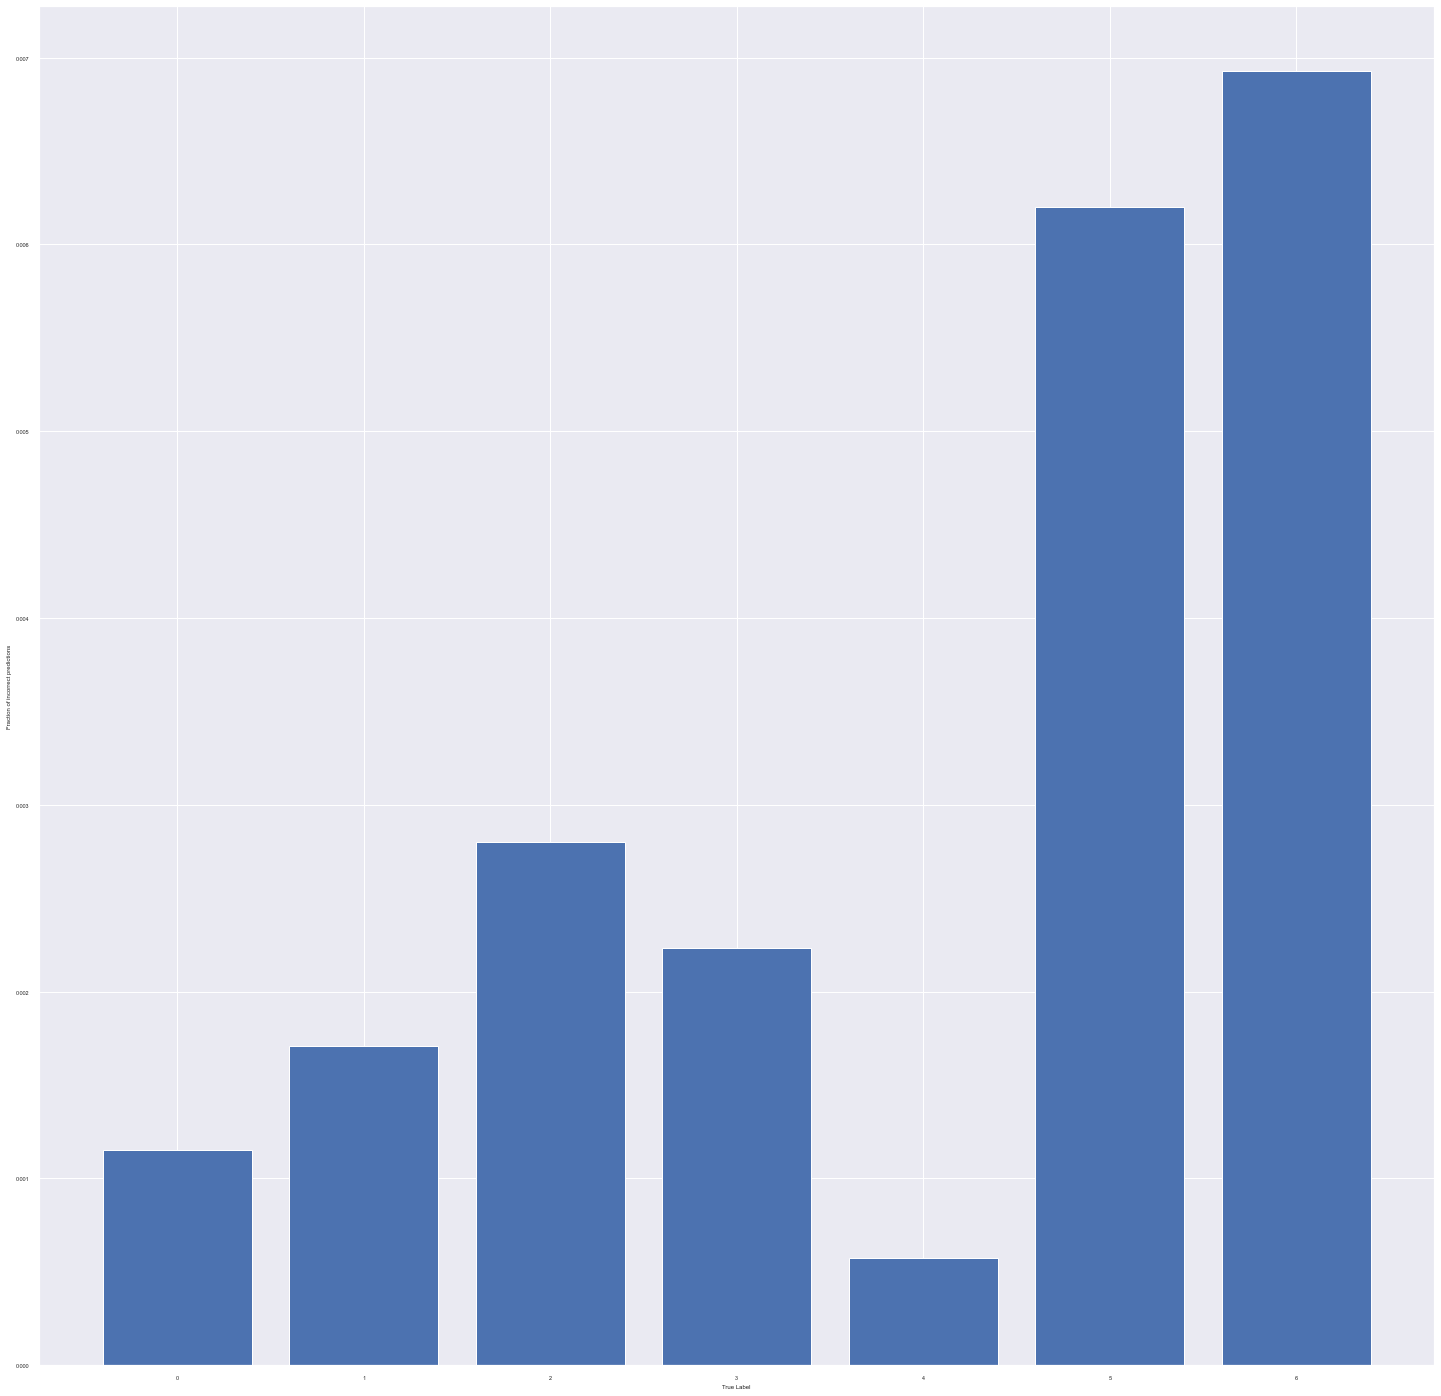

In [39]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(25,25))

plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [40]:
import keras
import pickle
import json

from keras.models import save_model

model.save('models/my_model_snips')

with open('utils/classes_snips.pkl','wb') as file:
   pickle.dump(classes,file)

with open('utils/tokenizer_snips.pkl','wb') as file:
   pickle.dump(tokenizer,file)

with open('utils/label_encoder_snips.pkl','wb') as file:
   pickle.dump(y_encoder,file)

INFO:tensorflow:Assets written to: models/my_model_snips\assets


INFO:tensorflow:Assets written to: models/my_model_snips\assets


In [41]:
# import keras
# import pickle

# model = keras.models.load_model('models/my_model')

# with open('utils/classes.pkl','rb') as file:
#   classes = pickle.load(file)

# with open('utils/tokenizer.pkl','rb') as file:
#   tokenizer = pickle.load(file)

# with open('utils/label_encoder.pkl','rb') as file:
#   y_encoder = pickle.load(file)